In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
len(train_labels)

60000

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

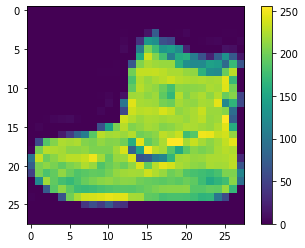

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

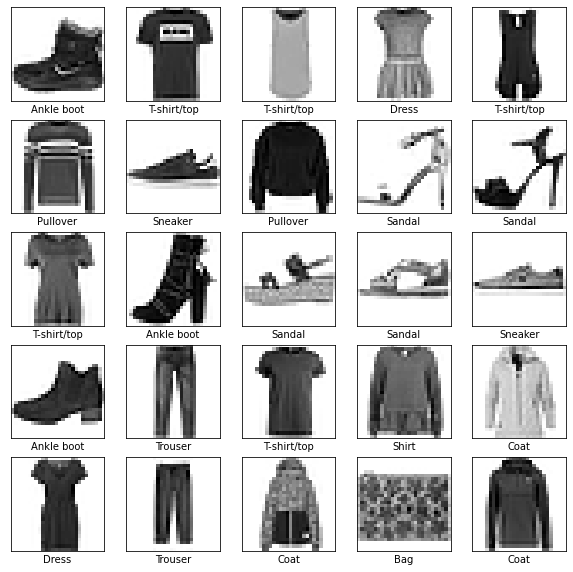

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5021 - accuracy: 0.8232
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3769 - accuracy: 0.8640
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3372 - accuracy: 0.8765


In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3715 - accuracy: 0.8618

Test accuracy: 0.8618000149726868


In [17]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [18]:
predictions = probability_model.predict(test_images)

In [19]:
predictions[0]

array([2.8328766e-06, 3.2494316e-07, 2.5728565e-07, 2.1560832e-07,
       1.5022870e-06, 7.3177218e-02, 1.2289967e-06, 5.2003380e-02,
       3.6912615e-04, 8.7444395e-01], dtype=float32)

In [20]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [21]:
class_names[test_labels[0]]

'Ankle boot'

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

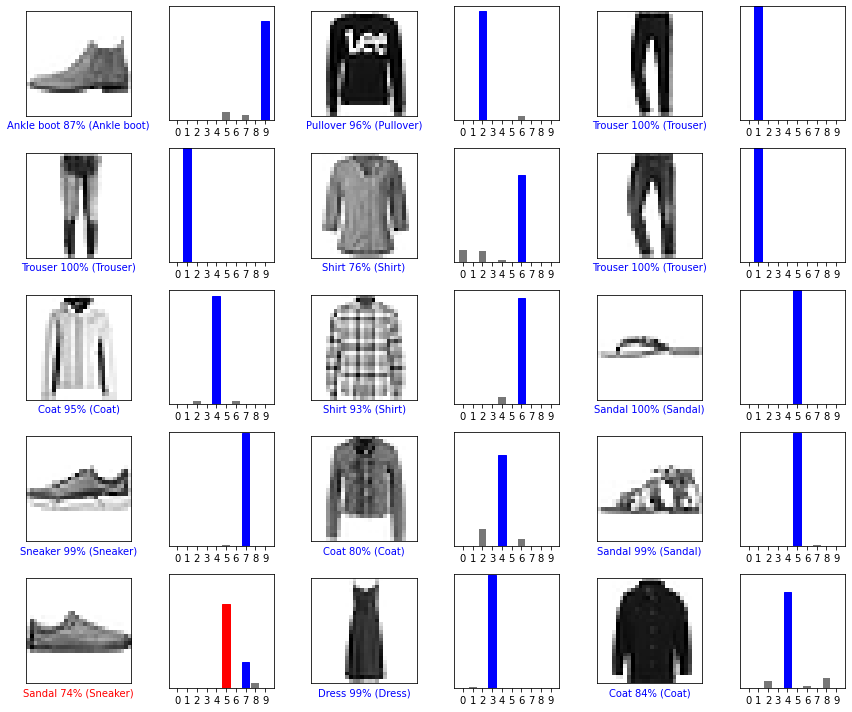

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [24]:
img = test_images[1]

print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.0294148e-05 1.3605663e-07 9.6293443e-01 3.7082279e-07 7.5164274e-04
  2.5305649e-09 3.6278676e-02 3.4430696e-12 4.5331089e-06 3.0984137e-13]]


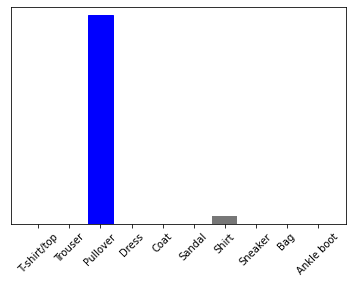

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [31]:
class_names[np.argmax(predictions_single[0])]

'Pullover'

In [32]:
class_names[test_labels[1]]

'Pullover'

In [75]:
number_of_neurons = [512, 256, 128]
activations = ['relu', 'sigmoid']
optimizers = ['sgd', 'rmsprop', 'adam']
x_input = keras.layers.Input(shape=(28,28))
models = []

for activat in activations:
  x = keras.layers.Flatten()(x_input)
  for number in number_of_neurons:
    x = keras.layers.Dense(number, activation=activat)(x)
    x_output = keras.layers.Dense(10, activation='softmax')(x)
    models.append(keras.models.Model(x_input,x_output))

print(len(models))
  

6


In [76]:
for  model in models:
  model.summary()


Model: "functional_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_254 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_255 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Model: "functional_255"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28)]          0         
______________________

In [78]:
models1 = models[:]
models2 = models[:]
models3 = models[:]

for i in range(len(models)):
  models1[i].compile(optimizer='sgd',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
  models2[i].compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  models3[i].compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [81]:
hist1 = []
hist2 = []
hist3 = []

for i in range(len(models)):
  models[i].summary()
  print(f'optimizer=sgd model: {i}')
  hist1.append(models1[i].fit(train_images, train_labels, epochs=3))
  print(f'optimizer=rmsprop model: {i}')
  hist2.append(models2[i].fit(train_images, train_labels, epochs=3))
  print(f'optimizer=adam model: {i}')
  hist3.append(models3[i].fit(train_images, train_labels, epochs=3))
  i += 1

Model: "functional_253"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_254 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_255 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
optimizer=sgd model: 0
Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7352 - accuracy: 0.7282
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6284 - accuracy: 0.8328
Epoch 3/3
1875/1875

In [82]:
# Сохраним лучшую модель
models3[5].save_weights('best_model.h5')

In [83]:
model3 = models3[5]

In [84]:
y_pred = model3.predict(test_images)
y_pred_arg = np.argmax(y_pred, axis=1)

In [85]:
# Посмотрим какой метке соответствует максимальное значение
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [86]:
# Функция для показа картинки
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
# Функция для показа результатов предсказания
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

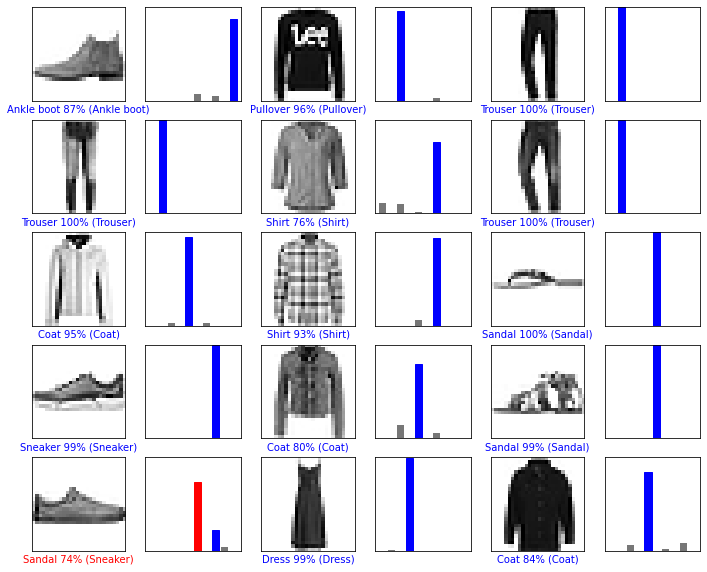

In [87]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки.
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()